# CellPLATO | Cell Plasticity Analysis Tool

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px

OVERWRITE_DATAFRAMES = True

Finished running cellPLATO initialization and loaded config.
Initializing:  Fig1_area50_framesto900_donors1and2_
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D://Michael_Shannon/CELLPLATO_MASTER/June2023_Chosen_analysis_donors1only_900frames_OUTPUT/Fig1_area50_framesto900_donors1and2_\2023-08-11_15-44-44-072565\plots/
Using unique embedding per dataset shortname:  Fig1_area50_framesto900_donors1and2_
Exporting static Superplots
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Exporting SNS Bar plots
Using corresponding CTL_SHORTLABEL:  ICAM1 + IL15  for condition:  Condition_ICAM_IL15
Dataset in current notebook:  Fig1_area50_framesto900_donors1and2_
Finished initializing data_processing



Bad key text.latex.preview in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

Finished intializing visualizations
Finished initializing cellPLATO


In [ ]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)
print(cp.SAVED_DATA_PATH)

In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

comb_df, new_factors = cp.measurement_pipeline(comb_df, mixed=cp.MIXED_SCALING, factors_to_timeaverage = cp.ALL_FACTORS) #If AVERAGE_TIME_WINDOWS is true, then the comb df contains new factors, which are output as 'new factors'
display(new_factors)

# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)

# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)

### Optional: load in precreated dataframes

In [ ]:
comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')

### Optional: do filtering on the data (on top of what has been stated in the config file)

In [ ]:
# User-defined filters in dict {factor:(min, max)}

data_filters = {
#   "speed": (10, 100),
  "area": (50, 10000),
#    "frame": (0, 450), # Warning: range will change if self-normalized
#   "ntpts": (12,1800)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = cp.apply_filters(comb_df,how='any', filter_dict=data_filters)

fig = cp.visualize_filtering(filt_df, filt_counts)

### Make a preview plot of any factor

In [ ]:
## Factor list: 
all_factors =  ['area',
                'bbox_area',
                'eccentricity',
                'equivalent_diameter',
                'extent',
                'filled_area',
                'major_axis_length',
                'minor_axis_length',
                'orientation',
                'perimeter',
                'solidity',
                'euclidean_dist',     
                'cumulative_length', 
                'speed',
                'orientedness', 
                'directedness',
                'turn_angle',
                'endpoint_dir_ratio',
                'dir_autocorr',
                'outreach_ratio',
                'MSD',                
                'max_dist',           
                'glob_turn_deg',
                'arrest_coefficient'
                'aspect',
                'rip_p',
                'rip_K',
                'rip_L']

In [ ]:
# Use filt_df or comb_df depending on what you want to see
f=cp.multi_condition_timeplot(filt_df, 'speed')
f.show()

In [ ]:
# Plot of difference


### Plot all metrics

In [ ]:
# Outputs plots of all metrics for all factors
cp.comparative_visualization_pipeline(comb_df, num_factors=all_factors) 

## Dimensionality reduction section (3D UMAP)

### Optional: for new datasets perform correlation analysis to understand which factors correlate to one another

In [ ]:
df_in = comb_df
cp.correlation_matrix_heatmap(df_in, factors = cp.ALL_FACTORS)

### Optional: use variance thresholder for further insight

In [ ]:
chosen_dr_factors = cp.variance_threshold(comb_df, threshold_value=0.03)
chosen_dr_factors

### Optional: define a new list of dr_factors to use for UMAP

In [ ]:
REGIONPROPS_LIST = ['area',
                    'bbox_area',
                    'eccentricity',
                    'equivalent_diameter',
                    'extent',
                    'filled_area',
                    'major_axis_length',
                    'minor_axis_length',
                    'orientation',
                    'perimeter',
                     'solidity'
                     ]

MIG_FACTORS = ['euclidean_dist',     
                'cumulative_length', 
                'speed',
                'orientedness', 
                'directedness',
                'turn_angle',
                'endpoint_dir_ratio',
                'dir_autocorr',
                'outreach_ratio',
                'MSD',                
                'max_dist',           
                'glob_turn_deg',
                'arrest_coefficient']

ADDITIONAL_FACTORS = ['aspect', 'rip_L'] # 'rip_p', 'rip_K', 


DR_FACTORS = REGIONPROPS_LIST + MIG_FACTORS + ADDITIONAL_FACTORS

## Perform UMAP and cluster analysis

### First, do UMAP, save the new df and plot the UMAP

In [ ]:
###### User alterable parameters ######
tsne_perp=150
umap_nn = 30 #umap nearest neighbours
min_dist = 0.0 #umap minimum distance (usually keep this at 0 or very low)
n_components = 3 # number of umap dimensions to calculate
#######################################



dr_df = cp.dr_pipeline_multiUMAPandTSNE(comb_df, 
                    dr_factors=DR_FACTORS,
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist= min_dist,
                    scalingmethod = 'choice',) # A number of scaling methods are available: 'choice', 'minmax', 'standard', 'robust', 'normalize', 'quantile', 'maxabs', 'yeo-johnson', 'box-cox'

dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df_30.csv', index=False) # Saves the df

cp.plot_3D_scatter(dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier='dr_df' + '_byCONDITION_',dotsize = 0.01, alpha=0.1, markerscale = 100) #color = label or condition  

### Second, identify clusters and exemplar cells using HDBSCAN

In [ ]:
##### User adjustable parameters #####
min_cluster_size = 1000
min_samples = 500
cluster_by = 'UMAPNDIM' # UMAPNDIM = default, clusters on UMAPs. NDIM = alternate, clusters on all dimensions
metric = 'euclidean' # See https://hdbscan.readthedocs.io/en/latest/api.html#hdbscan.HDBSCAN for options
#######################################

lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_by=cluster_by,  metric=metric)
lab_dr_df.name='lab_dr_df'
name = lab_dr_df.name

lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df_30.csv', index=False)
exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df_30.csv', index=False)

cp.plot_3D_scatter(lab_dr_df_30, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name + '_byCLUSTERID___',dotsize = 0.01, alpha=0.1, markerscale = 100) #color = label or condition   


## Then plot the 'fingerprint' plot of percentage in each cluster per condition

In [ ]:
# This is the new combo
cluster_purity_df = cp.purity_pointsinclusterspercondition(lab_dr_df) 
display(cluster_purity_df)
f = cp.purityplot_percentcluspercondition(lab_dr_df, cluster_purity_df) 

### Optional: explore the clusters with interactive 3D plot

In [ ]:
cp.interactive_plot_3D_UMAP(df=lab_dr_df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAPwithclusters') # TavgUMAPwithclusters

### Optional: all other conditions colored grey, chosen condition in color

In [ ]:
df=lab_dr_df

condlist = df['Condition_shortlabel'].unique().tolist() #get unique list of conditions from df
print(condlist) # show the condition list
# chosen_condition = '' #specify a chosen condition from the list
chosen_condition = condlist[0] # or choose the first one
print(chosen_condition)

cp.interactive_plot_3D_UMAP_chosen_condition(df, chosen_condition, opacity_grey=0.01, marker_size_all=2,) #change opacity and marker size to suit the data

### Optional: make UMAP plots colored by metric contributors - the more intense the color, the higher the contribution the metric to a cluster

In [ ]:
# First one colors per metric
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='choice',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = False, samplethedf = False)
#second one colors per condition
# cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=tptlabel_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='choice',
#                                                    identifier='inferno', colormap='inferno', coloredbycondition = True, samplethedf = False)

### Perform UMAP DR (and tSNE and PCA) and then cluster analysis on the tavg_df

### this is needed to make the downstream part, and for trajectory analysis

In [ ]:
tsne_perp=150
umap_nn = 20#4#60
min_dist = 0.0 #0.15 
n_components = 3

tavg_dr_df = cp.dr_pipeline_multiUMAPandTSNE(tavg_df, 
                    dr_factors=new_DR_FACTORS,# new_DR_FACTORS # DR_FACTORS #only_tmeans # cp.DR_FACTORS
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist= min_dist,
                    scalingmethod = 'choice',) # log2minmax # powertransformer #minmax
                    # positive_FACTORS = positive_FACTORS,
                    # negative_FACTORS = negative_FACTORS) 

# lab_tavg_dr_df, exemplar_tavg_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=20,min_samples=20,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # 
lab_tavg_dr_df, exemplar_tavg_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=50,min_samples=50,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # 
# lab_tavg_dr_df.name='lab_tavg_dr_df'
# name2 = lab_tavg_dr_df.name

# # dr_df.name='dr_df'
# # name = dr_df.name
# # cp.interactive_plot_3D_UMAP(df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAPwithclusters') # TavgUMAPwithclusters
# cp.plot_3D_scatter(lab_tavg_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name2 + '_byCLUSTERID___',dotsize = 30, alpha=0.5, markerscale = 5) #color = label or condition   
# cp.plot_3D_scatter(lab_tavg_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier=name2 + '_byCONDITION___',dotsize = 30, alpha=0.5, markerscale = 5) #color = label or condition  

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv', index=False)
    lab_tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv', index=False)
    exemplar_tavg_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv', index=False)

In [ ]:
#Run this function to put the labels into the lab_tavg_lab_dr_df. Slow function. Can update search by uniq_id alone...

lab_tavg_lab_dr_df=cp.add_tavglabel_todf(lab_dr_df, lab_tavg_dr_df)
lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv', index=False)

## Quantify the plasticity 

In [ ]:
tptlabel_dr_df = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df)
tptlabel_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv', index=False)

### Plots of plasticity

In [ ]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [ ]:
df=tptlabel_dr_df
# all='\_allcells'
cp.plot_plasticity_changes(df, identifier='\_allcells', maxy=4) #problem with NaNs in the data

In [ ]:
df=tptlabel_dr_df
cp.plot_plasticity_countplots(df, identifier='_allcells')

In [ ]:
df=tptlabel_dr_df
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_allcells', miny=None, maxy=None, t_window_multiplier = cp.T_WINDOW_MULTIPLIER, plotallcells = False)

# Disambiguate the clusters

### First, choose a number of exemplar cells to pick out from the exemplar cell list to display

In [ ]:
# Choose a number of exemplars to display for each cluster
n=2
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
size=300 #

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints, scaled_df=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=10, dr_factors= newnew_DR_FACTORS) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.plot_cluster_averages(top_dictionary, df, scaled_df)
cp.disambiguate_timepoint_dev(df, exemp_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True) 

In [2]:

tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

## Then, to visualize single cells with many timepoints, select cells with lots of timepoints

Filtering exemplars so that only those with > 222 timepoints are included
Aiming for 40 cells per cluster
Which means 320 cells in total
But we can accept 70 percent! Which means we are only aiming for 224.0 cells in total
Number of unique cells in exemplar_df:  10147
Number of unique cells in exemplar_df after filtering:  1006
The number of clusters in whole dataset is: 8 whereas represented in the filtered and ready exemplar = 8
Intended number of unique cells in the final df = 320 , and the actual number is 226
Intended number of unique cells in the final df = 320 , and the actual number is 226
The number of datapoints in the original dataframe was 1036092
The number of cells in the original dataframe was 14825
The number of datapoints in the new dataframe is 88020
The number of cells in the new dataframe is 226


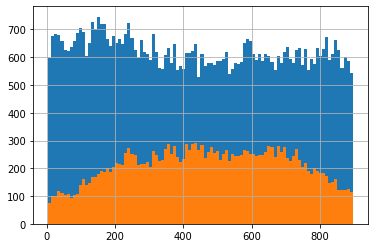

In [3]:
#### User inputs ####
whole_df = tptlabel_dr_df
exemplar_df = exemplar_df
numberofdesiredtimepoints = int(whole_df['ntpts'].mean())
# numberofdesiredtimepoints = 200
numberofcellspercluster = 40
num_clusters_whole_dataset = len(whole_df['label'].unique())

override = int((numberofcellspercluster*num_clusters_whole_dataset)*0.7)
#####################

exemplar_df_filt, exemplar_cell_tracks_df = cp.filter_exemplars(whole_df=whole_df, exemplar_df = exemplar_df, numberofdesiredtimepoints = numberofdesiredtimepoints, 
                                                                    numberofcellspercluster = numberofcellspercluster, override = override)

In [ ]:
df=exemplar_cell_tracks_df
# cp.plot_cumulative_plasticity_changes_test2(df, identifier='\_exemplars_only_3_df__', miny=None, maxy=None, t_window_multiplier = 1, plotallcells = True) #deprecated, use the small multiples version
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_exemplars_only_3_df__', miny=None, maxy=None, t_window_multiplier = 1, plotallcells = False)

### Plot any factor as small multiples from the exemplars

In [ ]:
df = exemplar_cell_tracks_df
whichcolumntoplot = 'label'

cp.plot_small_multiples(df, whichcolumntoplot)

### Re'disambiguate the new exemplar df!

In [ ]:
size=300 #

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints, scaled_df=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=10, dr_factors= newnew_DR_FACTORS) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.plot_cluster_averages(top_dictionary, df, scaled_df)
cp.disambiguate_timepoint_dev(df, exemp_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True) 

# Useful things

In [ ]:
REGIONPROPS_LIST = ['area',
                    # 'bbox_area',
                    'eccentricity',
                    'equivalent_diameter',
                    # 'extent',
                    'filled_area',
                    'major_axis_length',
                    'minor_axis_length',
                    # 'orientation',
                    'perimeter',
                    #  'solidity'
                     ]

MIG_FACTORS = ['euclidean_dist',     
                'cumulative_length', 
                'speed',
                # 'orientedness', 
                # 'directedness',
                # 'turn_angle',
                'endpoint_dir_ratio',
                # 'dir_autocorr',
                'outreach_ratio',
                'MSD',                
                'max_dist',           
                # 'glob_turn_deg',
                'arrest_coefficient']

ADDITIONAL_FACTORS = ['aspect', 'rip_L'] # 'rip_p', 'rip_K', 


newnew_DR_FACTORS = REGIONPROPS_LIST + MIG_FACTORS + ADDITIONAL_FACTORS

# Extra:

## Change the size of the timewindow for cluster switching

In [ ]:
lab_tavg_lab_dr_df=pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv')

In [ ]:

data_filters = {
#   "speed": (10, 100),
#    "twind_n_changes": (5, 20), # Warning: range will change if self-normalized
  "ntpts": (48,1800)
}

# Get the uniq_ID of the cells that pass the filters

lab_tavg_lab_dr_df_48filt, lab_tavg_lab_dr_df_counts = cp.apply_filters(lab_tavg_lab_dr_df, how='any', filter_dict=data_filters)
# lab_tavg_lab_dr_df_48filt_all, lab_tavg_lab_dr_df_counts = cp.apply_filters(lab_tavg_lab_dr_df, how='all', filter_dict=data_filters)

# saVE THE lab_tavg_lab_dr_df_48filt
lab_tavg_lab_dr_df_48filt.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df_48filt.csv')


In [ ]:
# make a new tptlabel_dr_df counting with the new time window

tptlabel_dr_df_filt48 = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df_48filt, t_window_multiplier=6)

In [ ]:
df=tptlabel_dr_df_filt48
# all='\_allcells'
cp.plot_plasticity_changes(df, identifier='\_allcells',) #problem with NaNs in the data  maxy=4